# Analysis of Momentum
In this notebook I compare the performance of MLP using different levels of momentum.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib import *

In [2]:
df = pd.read_csv('../scripts/results_summary.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4536 entries, ce2406bc88ceda4e2fde96bf96fdd2d5 to 9591fefef4086cbf060bc6afdcee4eba
Columns: 170 entries, activation_func to fail_rate
dtypes: bool(1), float64(164), int64(2), object(3)
memory usage: 5.9+ MB


## Effect of Momentum in Regression Tasks

The below graphs would suggest that learning rate does indeed have a different effect depending on the activation function. The ReLU activation function tends to blow up at higher learning rates.

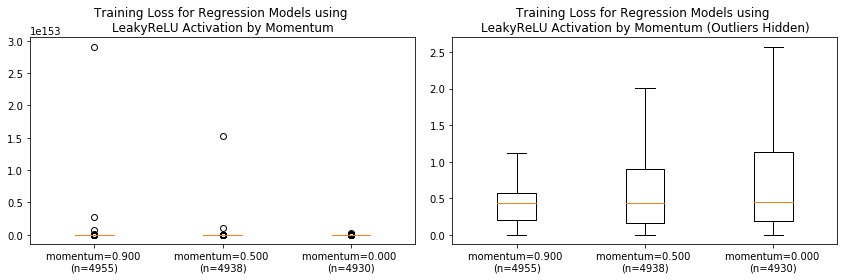

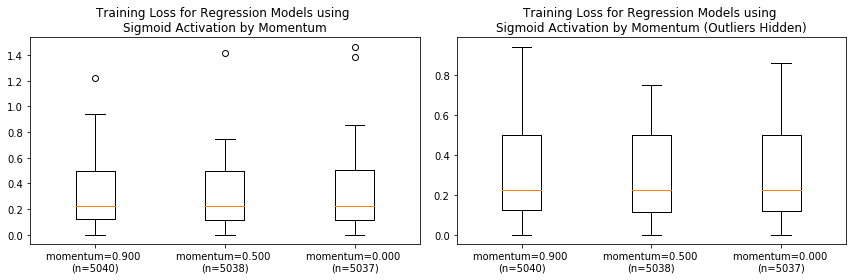

In [9]:
group_masks = [
    df['momentum'] == lr for lr in df['momentum'].unique()
]
configs = ['momentum=%.3f' % lr for lr in df['momentum'].unique()]
metric = 'train_loss'

for af_mask, af in zip([using_relu, ~using_relu], ['LeakyReLU', 'Sigmoid']):
    base_mask = using_regression & af_mask
    title = 'Training Loss for Regression Models using \n%s Activation by Momentum' % af

    make_n_way_boxplot(df, base_mask, group_masks, configs, metric, title)

Interestingly, in terms of final model performance momentum can have a negative impact (see plot for XOR). Otherwise it tends to have a small effect, and a large effect with the 535 dataset.

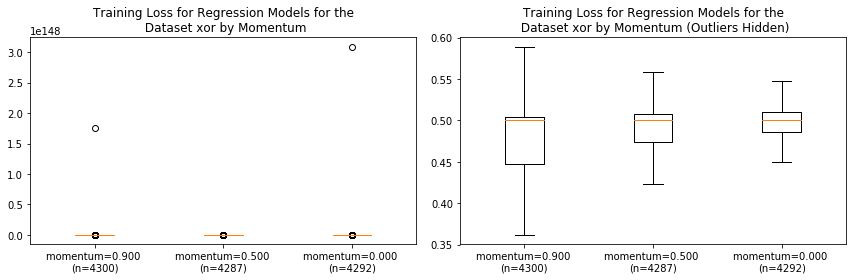

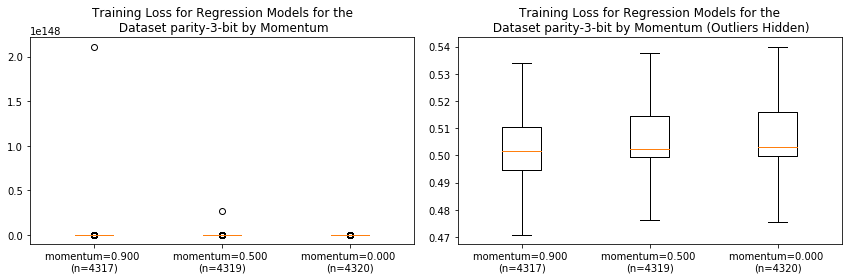

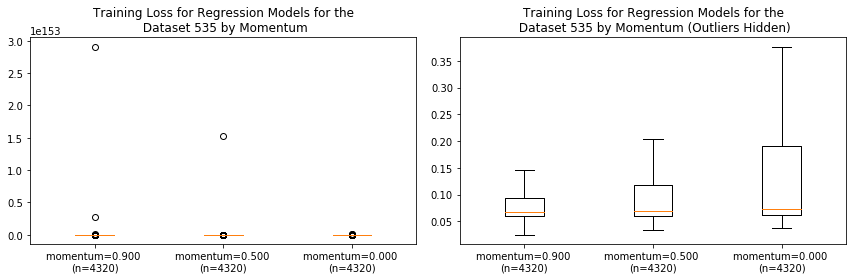

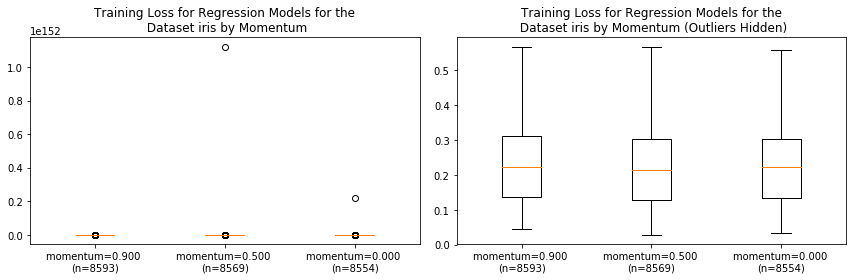

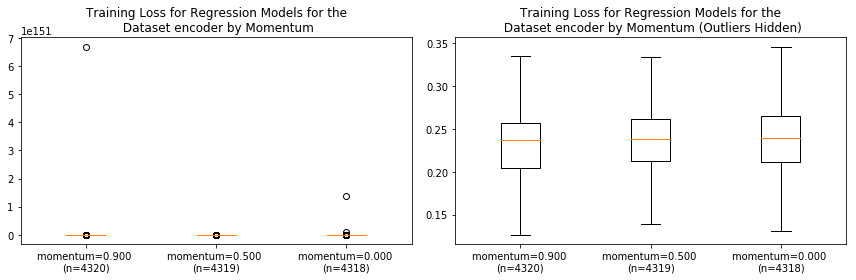

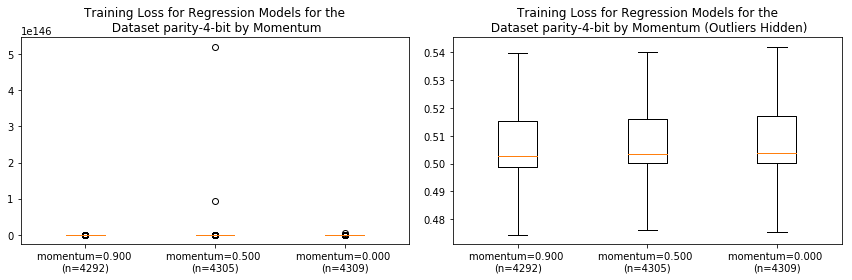

In [11]:
for ds_mask, ds in zip([df['dataset'] == dataset for dataset in datasets], datasets):
    base_mask = using_regression & ds_mask
    title = 'Training Loss for Regression Models for the\n Dataset %s by Momentum' % ds

    make_n_way_boxplot(df, base_mask, group_masks, configs, metric, title)

## Does the Same Thing Happen in Classification Tasks?
The majority of datasets models seem to see a small improvement in model performance from momentum and are more likely to find a better minima. Again, models trained on the XOR dataset seem to be worse off with momentum.

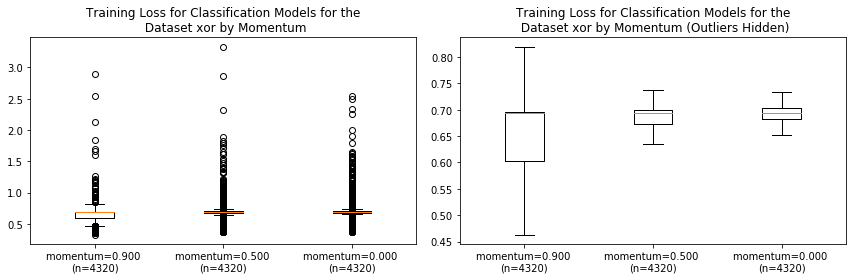

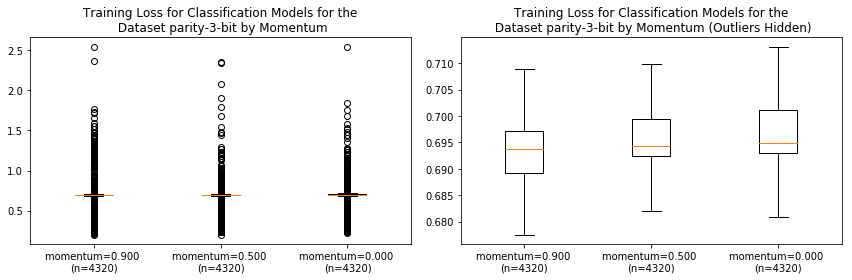

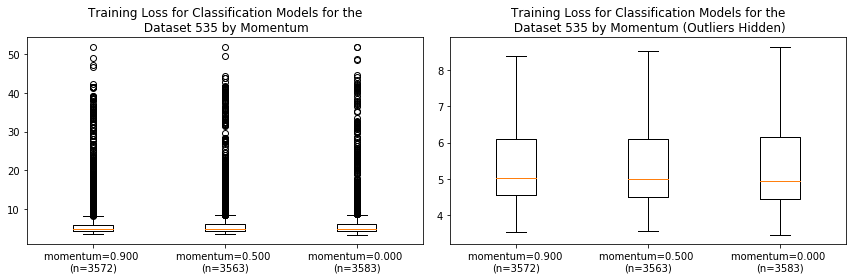

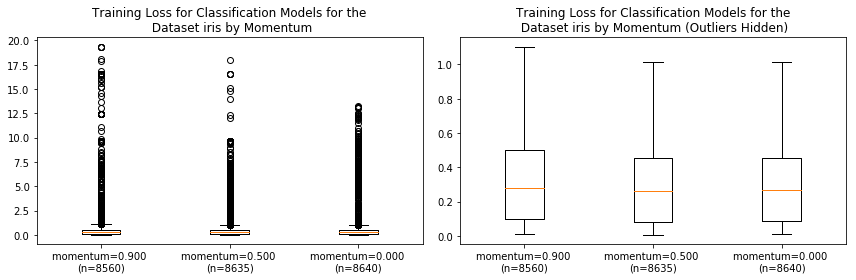

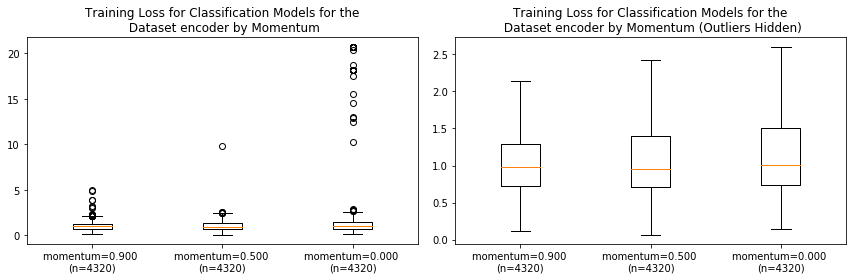

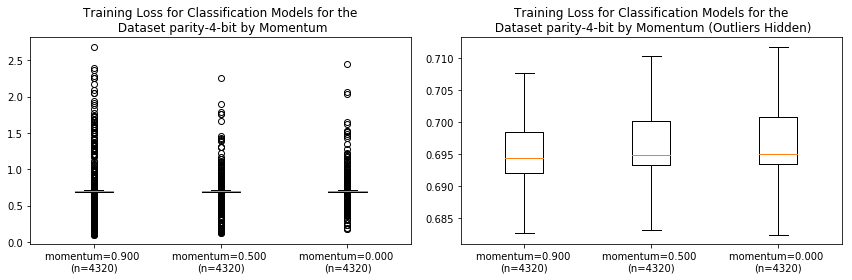

In [13]:
for ds_mask, ds in zip([df['dataset'] == dataset for dataset in datasets], datasets):
    base_mask = using_classification & ds_mask
    title = 'Training Loss for Classification Models for the\n Dataset %s by Momentum' % ds

    make_n_way_boxplot(df, base_mask, group_masks, configs, 'train_loss', title)

## Effect of Momentum on Failure Rate
Momentum seems to have no effect on failure rate.

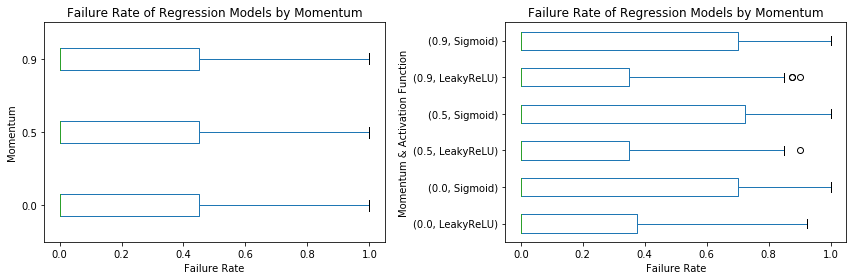

In [14]:
fig, axes = plt.subplots(1, 2, squeeze=True, figsize=(12, 4))

ax = df[using_regression].boxplot(column='fail_rate', by='momentum', 
                                  vert=False, grid=False, ax=axes[0])
ax.set_xlabel('Failure Rate')
ax.set_ylabel('Momentum')
ax.set_title('Failure Rate of Regression Models by Momentum')

ax = df[using_regression].boxplot(column='fail_rate', by=['momentum', 'activation_func'], 
                                  vert=False, grid=False, ax=axes[1])
ax.set_xlabel('Failure Rate')
ax.set_ylabel('Momentum & Activation Function')
ax.set_title('Failure Rate of Regression Models by Momentum')
plt.suptitle('');  # get rid of the generic title pandas gives us.
plt.tight_layout()